# <FONT COLOR="blue"> **Samsung Innovation Campus**</FONT>  

## <FONT COLOR="blue">**Codificación y Programación**</FONT>


#  **Capítulo 8. Mini proyecto de análisis y visualización de datos**

## Objetivos del capítulo

- Ser capaz de tener confianza haciendo los mismos resultados con el análisis y la visualización de datos que los expertos hacen en el campo sólo con lo que hemos aprendido a través del curso, que es el objetivo central del mini-proyecto.

- Ser capaz de entender que las habilidades de análisis de datos utilizando Python son habilidades esenciales en el campo real mediante la resolución de casos del mundo real a través del mini-proyecto.
Ser capaz de practicar en el campo de la contabilidad financiera a través de tareas de análisis de datos financieros.

- Ser capaz de practicar en la resolución de diversos problemas sociales del mundo real a través de tareas de análisis de datos públicos.

## Contenido del capítulo

- Unidad 39. Mini proyecto de análisis de datos financieros
- Unidad 40. Mini Proyecto de Análisis de la Pandemia Global de Corona


# **Unidad 39. Mini proyecto de análisis de datos financieros**


##  <FONT COLOR="blue">Misión</FONT>

## **Mini proyecto de análisis de datos financieros**

Con el rápido aumento de la velocidad de la computación, la humanidad ha sido capaz de organizar y analizar grandes cantidades de datos que nunca antes se habían experimentado a una velocidad increíblemente alta.

En base a esto, es posible que los ordenadores aprendan y se desarrollen hasta el estado actual de la inteligencia artificial.

Incluso si no te conviertes en un ingeniero de software, puedes resolver muchos problemas prácticos que puedes ver en el mundo real a través de las habilidades de procesamiento de datos que has aprendido hasta ahora usando Python y especialmente Pandas.

Pandas, una biblioteca central de análisis de datos aplicada en varios campos, fue desarrollada originalmente para analizar y organizar datos financieros.

El núcleo del análisis de datos es el análisis de datos financieros. A través de la práctica de adquirir y procesar datos financieros de diversos factores acumulados durante un período de tiempo, puede estar suficientemente preparado para la mayoría de los tipos de datos que verá en el trabajo del mundo real.
El análisis de datos financieros es la práctica más eficaz en el análisis de datos.

<br>
Ahora, utilicemos todas las habilidades que hemos aprendido hasta ahora para resolver las siguientes tareas.

- Obtención de datos financieros desde repositorios de datos remotos
- Visualización de datos de precios de acciones basados en datos de series temporales
- Visualización de los datos del volumen de operaciones a partir de datos de series temporales
- Medición de la tasa diaria simple
- Cálculo de la tasa de rendimiento diaria simple acumulada
- Cálculo de la tasa de rendimiento moviendo el periodo por meses
- Cálculo de la media móvil
- Análisis de la correlación entre cada factor de los datos financieros Cálculo de la volatilidad del precio de las acciones.

El material de datos que se utiliza para el análisis de datos son los datos bursátiles que rastrean diversos sectores y condiciones económicas. No se trata simplemente de analizar el precio de las acciones de una empresa concreta. Se eligió porque no hay mejores datos objetivo para entender cada situación económica como una economía real. Además, los datos objetivo no son para empresas, materias primas, bonos o en un país concreto, sino para el precio de los productos agrícolas en todo el mundo.

Dado que el mercado estadounidense tiene un impacto muy grande en la economía real del mundo, se seleccionó como una buena práctica con datos significativos.

**Nombre del ticker**

- SPY, que sigue el principal índice estadounidense S&P 500
- IYW, que sigue el índice de capitalización bursátil de las empresas tecnológicas estadounidenses
- VT, que invierte en empresas de todo el mundo
- DBA, que sigue la oferta y la demanda de productos agrícolas y sus precios
- Índice de bonos estadounidenses TLT
- PDBC, que sigue la oferta y la demanda de otras materias primas y los precios
- Oro IAU



###  <FONT COLOR="blue">Vamos a codificar</FONT>

####  <FONT COLOR="blue">**Paso 1**</FONT>

Preparemos la adquisición de datos y creemos funciones de adquisición de datos.

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas_datareader.data as web

from datetime import date, datetime, time, timezone

Una función que obtiene la cotización de una acción determinada cuando se introduce el código del teletipo.

In [2]:
def obtener_datos_stock(ticker, inicio, final):
    datos = web.DataReader(ticker, 'yahoo', inicio, final)
    datos.insert(0,'Ticker', ticker)
    return datos

**Línea 2,3**

2: Lea los datos de las acciones de Yahoo Finanzas. <br>
3: Crear un nombre de columna llamado Ticker en el índice 0 del marco de datos llamado data creado anteriormente, y poner el nombre del ticker para el elemento de datos.


Para comprobar si la adquisición de datos funciona correctamente, introduzca el código del teletipo de Disney para probar la función.

La búsqueda del ticker se puede hacer fácilmente a través de Yahoo Finance o investing.com


In [3]:
ticker = 'DIS'
inicio = datetime(2020,1,1)
final = datetime.today()

**Línea 1-3**

1: El código de ticker se obtiene a través de la búsqueda. Busque el código de ticker de la empresa que le interesa y utilícelo. <br>
2: Especifique la fecha de inicio como marca de tiempo. <br>
3: Especifique que desea adquirir los datos hasta el día de hoy. Se puede especificar como. <br>

In [4]:
d = obtener_datos_stock(ticker, inicio, final)
d.head()

,Ticker,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2020-01-02,DIS,148.199997,145.100006,145.289993,148.199997,9502100,148.199997
2020-01-03,DIS,147.899994,146.050003,146.399994,146.500000,7320200,146.500000
2020-01-06,DIS,146.029999,144.309998,145.539993,145.649994,8262500,145.649994
2020-01-07,DIS,146.869995,145.419998,145.990005,145.699997,6906500,145.699997
2020-01-08,DIS,146.130005,144.820007,145.490005,145.399994,6984200,145.399994


**Linea 1-2**

1: Guarde los datos de precio máximo, precio mínimo, precio de apertura, precio de cierre, volumen de negociación y precio de cierre modificado para el ticker en el marco de datos llamado d. <br>
2: Compruebe los datos para ver si la función funciona correctamente.


Dado que el análisis se basará únicamente en el precio de cierre de cada teletipo, pivote en la forma requerida.


In [5]:
d = d.pivot(index=None, columns='Ticker', values='Close')
d.head()

Ticker,DIS
Date,
2020-01-02,148.199997
2020-01-03,146.500000
2020-01-06,145.649994
2020-01-07,145.699997
2020-01-08,145.399994


####  <FONT COLOR="blue">**Paso 2**</FONT>

Cree un marco de datos necesario para el análisis utilizando la función creada.

El nombre del marco de datos es el nombre de cada ticker: SPY / IYW / VT / DBA / TLT / PDBC / IAU


In [6]:
SPY = obtener_datos_stock('SPY', inicio, final)
IYW = obtener_datos_stock('IYW', inicio, final)
VT = obtener_datos_stock('VT', inicio, final)
DBA = obtener_datos_stock('DBA', inicio, final)
TLT = obtener_datos_stock('TLT', inicio, final)
PDBC = obtener_datos_stock('PDBC', inicio, final)
IAU = obtener_datos_stock('IAU', inicio, final)

In [7]:
SPY.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 695 entries, 2020-01-02 to 2022-10-04
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     695 non-null    object 
 1   High       695 non-null    float64
 2   Low        695 non-null    float64
 3   Open       695 non-null    float64
 4   Close      695 non-null    float64
 5   Volume     695 non-null    float64
 6   Adj Close  695 non-null    float64
dtypes: float64(6), object(1)
memory usage: 43.4+ KB


**Linea 1**
- Es un DatetimeIndex y no hay ningún NaN

In [8]:
# Ejecutar el pivoteo por marco de datos
SPY = SPY.pivot(index=None, columns='Ticker', values='Close')
IYW = IYW.pivot(index=None, columns='Ticker', values='Close')
VT = VT.pivot(index=None, columns='Ticker', values='Close')
DBA = DBA.pivot(index=None, columns='Ticker', values='Close')
TLT = TLT.pivot(index=None, columns='Ticker', values='Close')
PDBC = PDBC.pivot(index=None, columns='Ticker', values='Close')
IAU = IAU.pivot(index=None, columns='Ticker', values='Close')

**Linea 1**
- Ejecutar el pivoteo por marco de datos

Cada marco de datos creado se combina en un marco de datos para un análisis eficiente.

En este momento, si la configuración y las propiedades de los marcos de datos que se van a combinar son las mismas, se puede mantener la coherencia de los datos independientemente de la dirección de la fila o la columna. Recuerde que esto es algo que debe comprobar antes de fusionar marcos de datos.

Cada marco de datos que vamos a fusionar ahora tiene el mismo índice, la misma columna y el mismo tipo de elementos de datos. Por lo tanto, utilizamos la función concat() para concatenar manteniendo la forma del marco de datos existente.


In [ ]:
pandas.concat(objs, axis=0, join='outer', ignore_index=False, keys=None,
              levels=None, names=None, verify_integrity=False, sort=False, copy=True)

*https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html*


In [9]:
stock = pd.concat([SPY,IYW,VT,DBA,TLT,PDBC,IAU],
                  axis=1,
                  join='outer')
stock.head()

Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Date,,,,,,,
2020-01-02,324.869995,59.355000,81.809998,16.500000,137.009995,16.639999,29.219999
2020-01-03,322.410004,58.762501,81.070000,16.309999,139.119995,16.780001,29.620001
2020-01-06,323.640015,59.125000,81.370003,16.350000,138.330002,16.799999,29.920000
2020-01-07,322.730011,59.147499,81.120003,16.389999,137.649994,16.770000,30.040001
2020-01-08,324.450012,59.737499,81.449997,16.309999,136.740005,16.540001,29.820000


**Lineas 1-3**

1: List the data frames to be concatenated.<br>
2: The default option is axis=0. Each data frame is concatenated vertically.<br>
3: If the column name is inner, the standard is the intersection of each data frame. The default value is outer

####  <FONT COLOR="blue">**Paso 3**</FONT>

Si dibuja un gráfico basado en los datos del precio de cierre en una serie temporal (fecha), puede comprobar el movimiento del precio de las acciones. Superponiendo los gráficos de cada teletipo, puede ver la correlación aproximada.


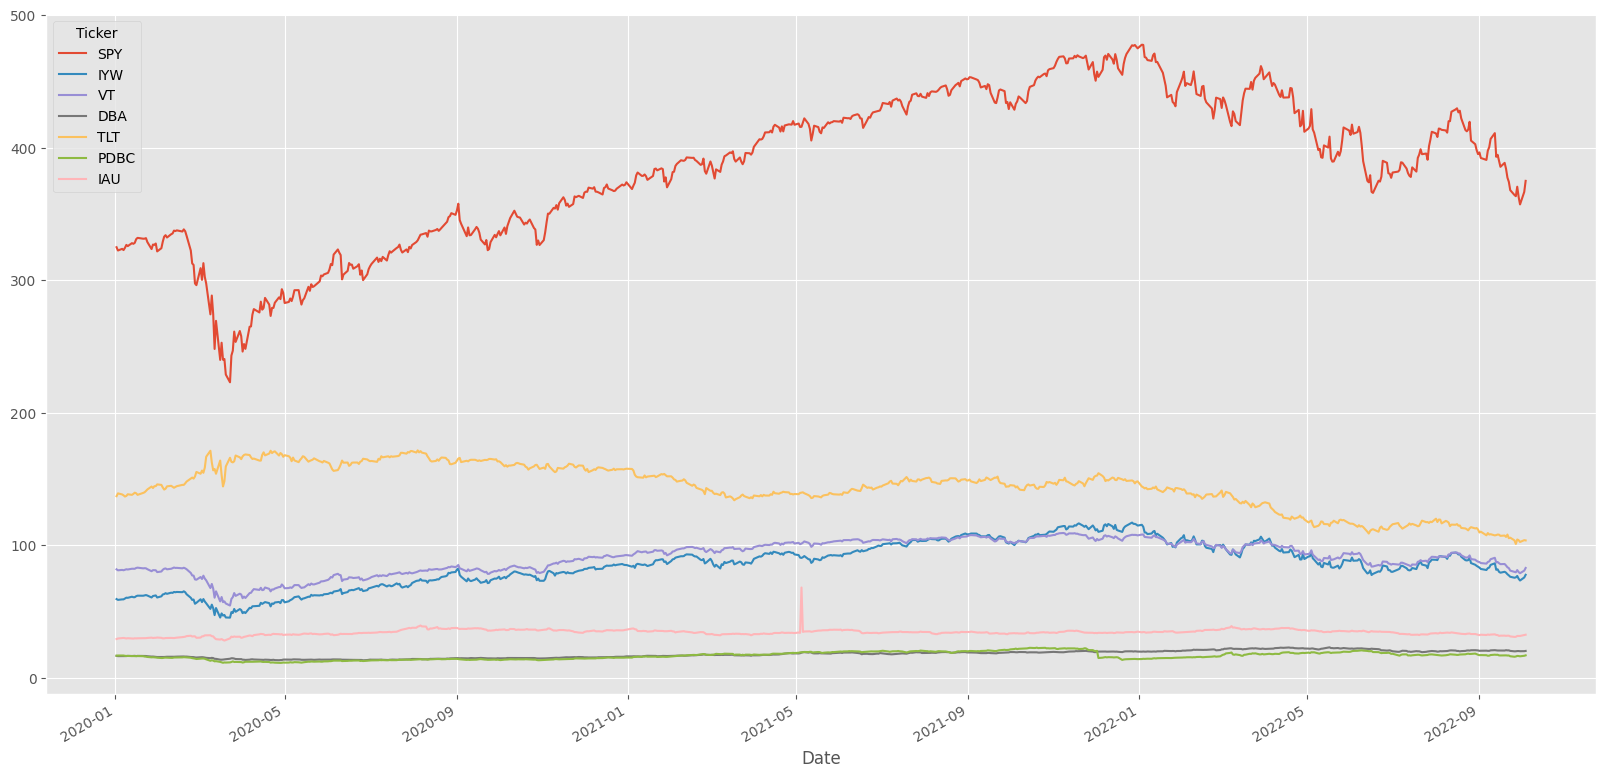

In [10]:
plt.style.use('ggplot')
stock.plot(figsize = (20,10))
plt.show()

**Linea 1**

- Especifica el estilo del gráfico.


Si ves el gráfico de abajo, hay una sección con serias fluctuaciones de precios. Se trata del periodo en el que comenzó Corona. Comprobemos los datos cortándolos con el índice de datos de la serie temporal sólo para este periodo.


In [40]:
covid = stock['2020-2-1':'2020-7-31']

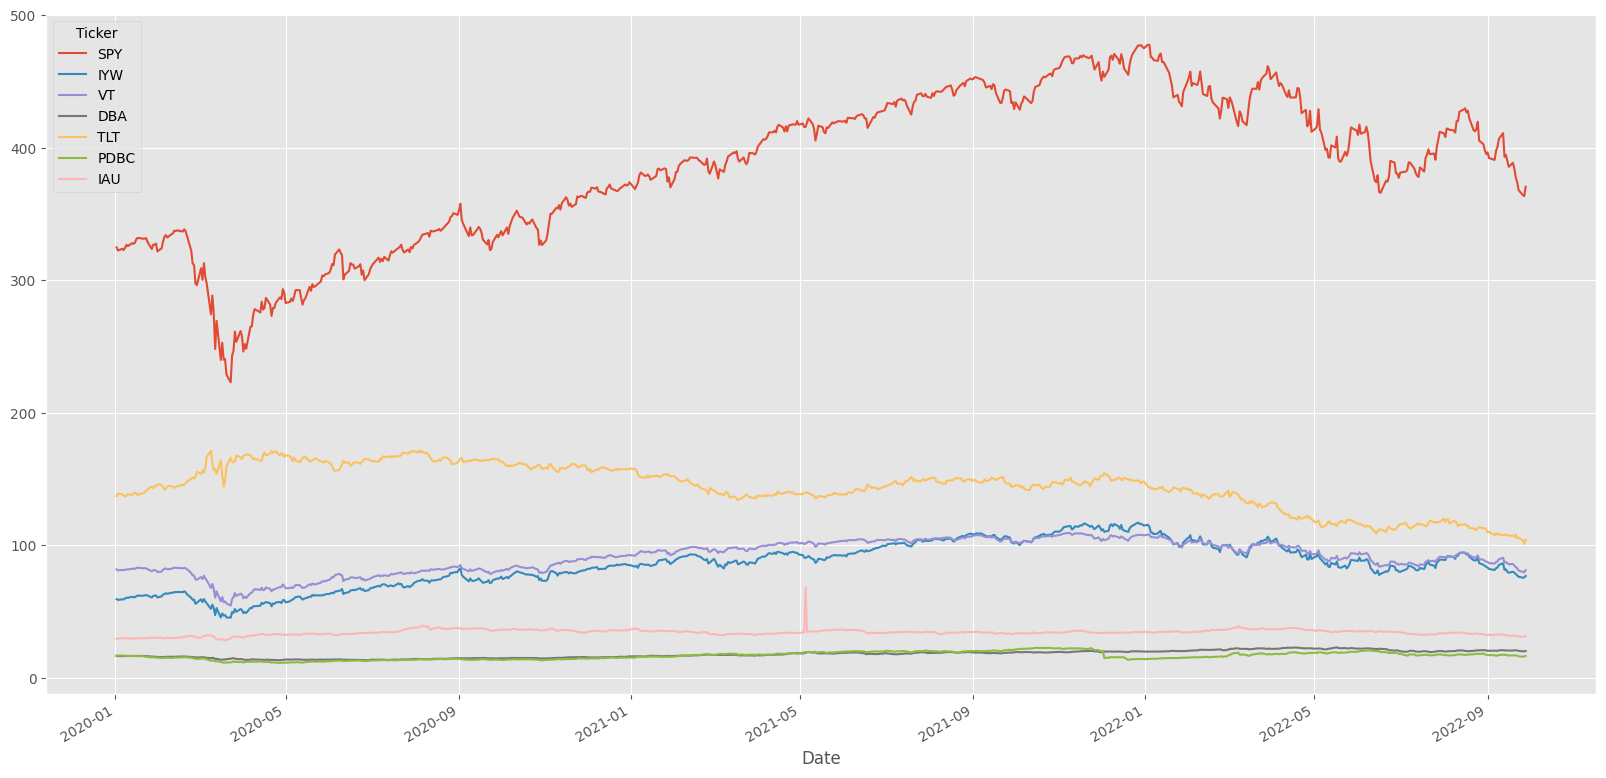

In [41]:
plt.style.use('ggplot')
stock.plot(figsize = (20,10))
plt.show()

**Lineas 1-3**

1: Especifique el estilo del gráfico.<br>
3: Hay factores que tienen un gran impacto en las fluctuaciones de los precios tras el choque de la corona, mientras que hay factores que suben hasta ese punto o tienen poco efecto.


Separemos los factores relevantes del periodo para comprobar el gráfico.


In [42]:
x = covid.index
s_y = covid[['SPY']]
i_y = covid[['IAU']]
d_y = covid[['DBA']]
t_y = covid[['TLT']]

**Linea 2**

- Seleccione tres datos con personalidades diferentes y compáralos.


Comparemos cómo reaccionan los activos con diferentes personalidades en momentos de gran conmoción económica como el coronavirus.

Se puede ver que el precio de las acciones en general disminuye bruscamente y luego se recupera gradualmente, pero el oro y los bonos son lo contrario. En particular, en el caso de los bonos, se puede ver que la tendencia es opuesta a la del precio de las acciones.


Text(0.5, 0.98, 'Covid 19')

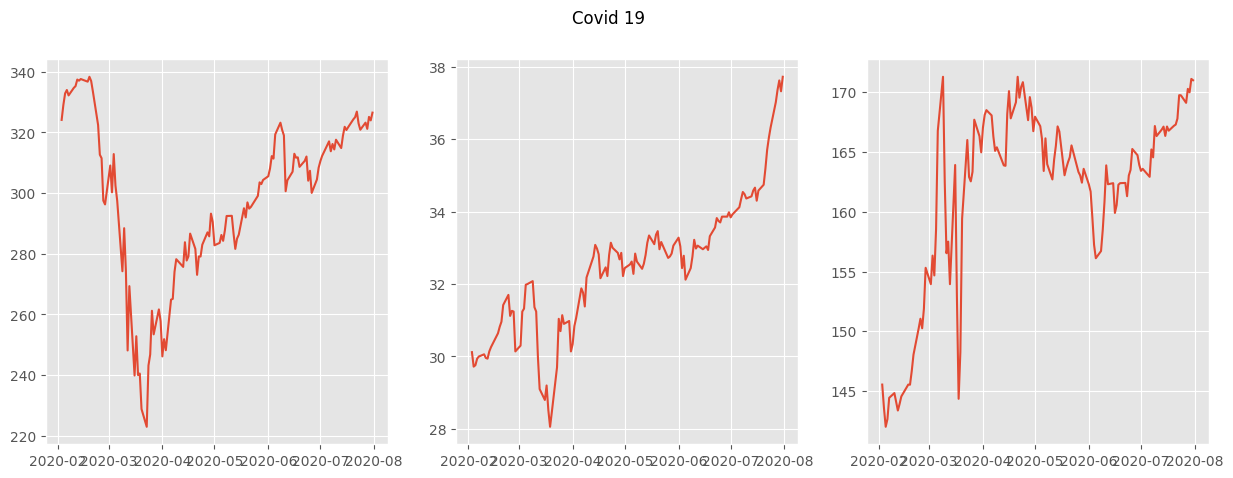

In [44]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].plot(x, s_y)
axs[1].plot(x, i_y)
axs[2].plot(x, t_y)

fig.suptitle('Covid 19')

**Lineas 4-6**

4: SPY <br>
5: IAU <br>
6: TLT


Estos gráficos son el resultado del código anterior.

<div align="center"><img src="https://github.com/Repositorio17092022/RepositorioiImagenes/blob/main/unidad39/imagen25.png?raw=true"  width= "850px" /></div>

####  <FONT COLOR="blue">**Paso 4**</FONT>

Visualicemos los datos de volumen de negociación en forma de gráfico de barras para un ticker concreto.

In [45]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas_datareader.data as web

from datetime import date, datetime, time, timezone

In [11]:
def obtener_datos_stock(ticker, start, end):
    datos = web.DataReader(ticker, 'yahoo', start, end)
    datos.insert(0,'Ticker', ticker)
    return datos

In [12]:
ticker = 'PDBC'
inicio = datetime(2020,1,1)
final = datetime.today()

**Lineas 1-3**

- Estadísticas sobre las materias primas
- Especifique la fecha de inicio con una marca de tiempo.
- Especifique que se adquieran datos hasta el día de hoy.


In [13]:
df = obtener_datos_stock(ticker, inicio, final)
df.head()

,Ticker,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2020-01-02,PDBC,16.670000,16.520000,16.570000,16.639999,4004600.0,10.817480
2020-01-03,PDBC,16.840000,16.709999,16.809999,16.780001,760200.0,10.908494
2020-01-06,PDBC,16.910000,16.770000,16.900000,16.799999,1608700.0,10.921494
2020-01-07,PDBC,16.799999,16.716999,16.750000,16.770000,1723200.0,10.901994
2020-01-08,PDBC,16.770000,16.363001,16.770000,16.540001,923300.0,10.752473


**Linea 1**

- En un marco de datos llamado df, se almacenan los datos del precio máximo, el precio mínimo, el precio de apertura, el precio de cierre, el volumen de negociación y el precio de cierre modificado para el ticker correspondiente.


In [49]:
df.drop(['Ticker','High', 'Low', 'Open', 'Close', 'Adj Close'], axis=1, inplace=True)

**Linea 1**

- Eliminar todos excepto la columna de volumen

In [50]:
df.head()

,Volume
Date,
2020-01-02,4004600.0
2020-01-03,760200.0
2020-01-06,1608700.0
2020-01-07,1723200.0
2020-01-08,923300.0


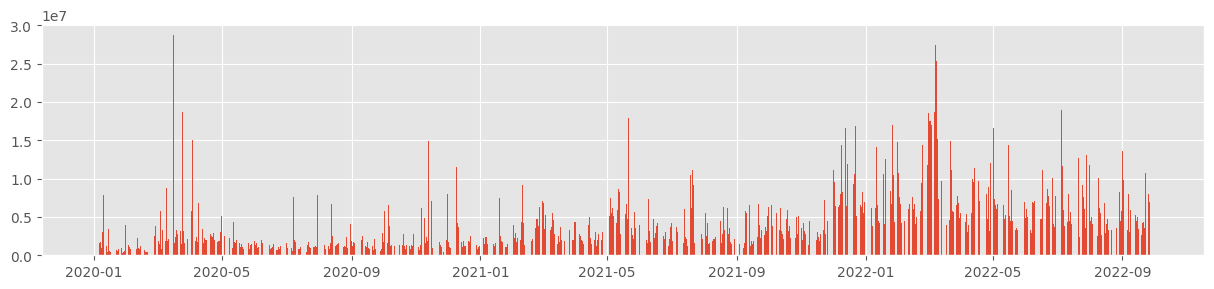

In [56]:
x = df.index
y = df['Volume']
plt.figure(figsize=(15,3))
plt.bar(x,y)
plt.show()

####  <FONT COLOR="blue">**Paso 5**</FONT>

Utilizando el subplot2grid de matplotlib, el gráfico del precio de cierre se visualiza en el diseño superior y el volumen de negociación en el mismo período se visualiza en el diseño inferior.


In [ ]:
# ax = subplot2grid((nrows, ncols), (row, col), rowspan, colspan)

*https://matplotlib.org/stable/gallery/userdemo/demo_gridspec01.html#sphx-glr-gallery-userdemo-demo-gridspec01-py*


In [14]:
ticker = 'PDBC'
inicio = datetime(2020,1,1)
final = datetime.today()

Lineas 1-3

- Estadísticas sobre las materias primas
- Especifique la fecha de inicio con una marca de tiempo.
- Especifique que se adquieran datos hasta el día de hoy.


In [15]:
df = obtener_datos_stock(ticker, inicio, final)

In [ ]:
# ax = subplot2grid((nrows, ncols), (row, col), rowspan, colspan)

In [ ]:
fig = plt.figure(figsize=(12, 8))

rejilla_superior = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)
rejilla_inferior = plt.subplot2grid((4, 4), (3, 0), rowspan=1, colspan=4)

rejilla_superior.plot(df.index, df['Close'], label='Close')
rejilla_inferior.plot(df.index, df['Volume'], label='Volume')

plt.tight_layout()

plt.legend()
plt.show()

**Lineas 1-3**

- Establezca el rango, la posición inicial y el rango ocupado de la cuadrícula del área superior.
- Establezca el rango, la posición inicial y el rango ocupado de la rejilla del área inferior.
- Mostrar los datos del precio de cierre en la rejilla superior.
- Mostrar los datos de volumen en la rejilla inferior.
- Una función que permite imprimir los subplots al tamaño máximo en la figura


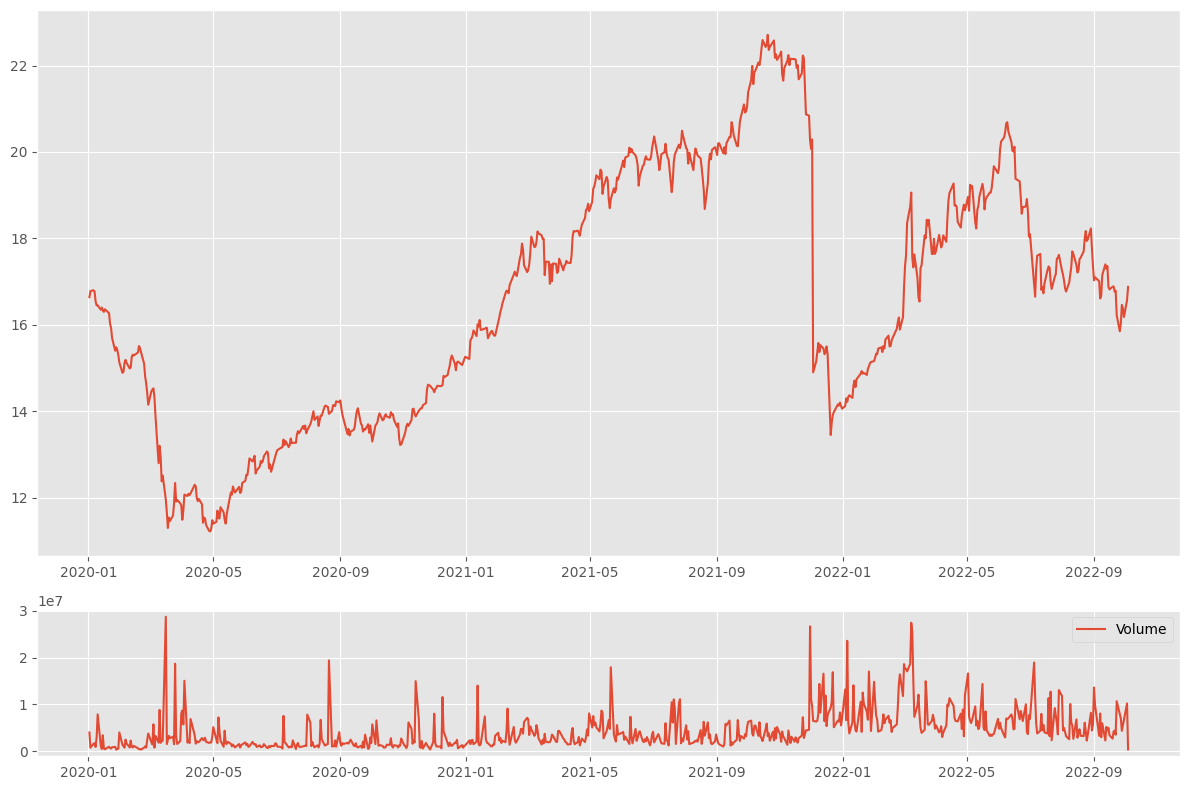

In [17]:
fig = plt.figure(figsize=(12, 8))

rejilla_superior = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)
rejilla_inferior = plt.subplot2grid((4, 4), (3, 0), rowspan=1, colspan=4)

rejilla_superior.plot(df.index, df['Close'], label='Close')
rejilla_inferior.plot(df.index, df['Volume'], label='Volume')

plt.tight_layout()

plt.legend()
plt.show()

####  <FONT COLOR="blue">**Paso 6**</FONT>

Utilizaremos el método pandas.Series.shift() para calcular el cambio porcentual diario.

*https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.shift.html?highlight=shift#pandas.Series.shift*

Comparar los datos actuales con los datos de un momento determinado para calcular el cambio porcentual es también una tarea habitual en el trabajo diario.
Si resuelves esto con Excel, puedes hacerlo como se muestra a continuación. Si ves la imagen, podrás entender por qué es útil el método shift().

<div align="center"><img src="https://github.com/Repositorio17092022/RepositorioiImagenes/blob/main/unidad39/imagen35.png?raw=true"  width= "500px" /></div>

In [ ]:
# pandas.Series.shift() 

La fórmula para calcular la variación porcentual diaria basada en el precio de cierre es sencilla.

<strong>
Cambio porcentual diario de hoy = ((Precio de cierre de hoy - Precio de cierre de ayer) / Precio de cierre de ayer) * 100
Cambio porcentual diario = (Valor nuevo - Valor original) / Valor original * 100
</strong>

<div align="center"><img src="https://github.com/Repositorio17092022/RepositorioiImagenes/blob/main/unidad39/imagen36.png?raw=true"  width= "500px" /></div>

In [69]:
stock.head()

Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Date,,,,,,,
2020-01-02,324.869995,59.355000,81.809998,16.500000,137.009995,16.639999,29.219999
2020-01-03,322.410004,58.762501,81.070000,16.309999,139.119995,16.780001,29.620001
2020-01-06,323.640015,59.125000,81.370003,16.350000,138.330002,16.799999,29.920000
2020-01-07,322.730011,59.147499,81.120003,16.389999,137.649994,16.770000,30.040001
2020-01-08,324.450012,59.737499,81.449997,16.309999,136.740005,16.540001,29.820000


In [71]:
stock['SPY']

Date
2020-01-02    324.869995
2020-01-03    322.410004
2020-01-06    323.640015
2020-01-07    322.730011
2020-01-08    324.450012
                 ...    
2022-09-22    374.220001
2022-09-23    367.950012
2022-09-26    364.309998
2022-09-27    363.380005
2022-09-28    370.529999
Name: SPY, Length: 691, dtype: float64

In [73]:
stock['SPY'].shift(1)

Date
2020-01-02           NaN
2020-01-03    324.869995
2020-01-06    322.410004
2020-01-07    323.640015
2020-01-08    322.730011
                 ...    
2022-09-22    377.390015
2022-09-23    374.220001
2022-09-26    367.950012
2022-09-27    364.309998
2022-09-28    363.380005
Name: SPY, Length: 691, dtype: float64

In [74]:
spy_daily_pc = (stock['SPY']/stock['SPY'].shift(1)-1)*100

In [75]:
spy_daily_pc

Date
2020-01-02         NaN
2020-01-03   -0.757223
2020-01-06    0.381505
2020-01-07   -0.281178
2020-01-08    0.532954
                ...   
2022-09-22   -0.839983
2022-09-23   -1.675482
2022-09-26   -0.989269
2022-09-27   -0.255275
2022-09-28    1.967635
Name: SPY, Length: 691, dtype: float64

<AxesSubplot: xlabel='Date'>

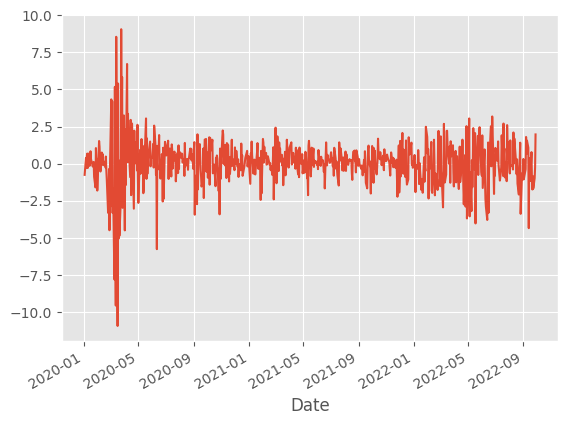

In [76]:
spy_daily_pc.plot()

Un histograma es un gráfico que muestra la distribución de frecuencias.

Representa la frecuencia de los valores de los datos por tiempo.

En este momento, el número de secciones se utiliza estableciendo el valor del parámetro bins de la función hist().

Como referencia, el valor por defecto de hist() es 10. La forma del gráfico cambia en función de los bins.

Debe establecer el valor de los bins comprobando cuidadosamente las características de los datos.

*https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html?highlight=hist#pandas.DataFrame.hist*




In [ ]:
spy_daily_pc = (stock['SPY']-stock['SPY'].shift(1))/stock['SPY'].shift(1) *100

**Linea 1**

No confundas la nueva fórmula. Sólo está escrita para ayudarte a entender.

In [ ]:
spy_daily_pc.iloc[0] = 0

**Linea 1**

Como el primer valor es un dato que falta, se sustituye por 0.

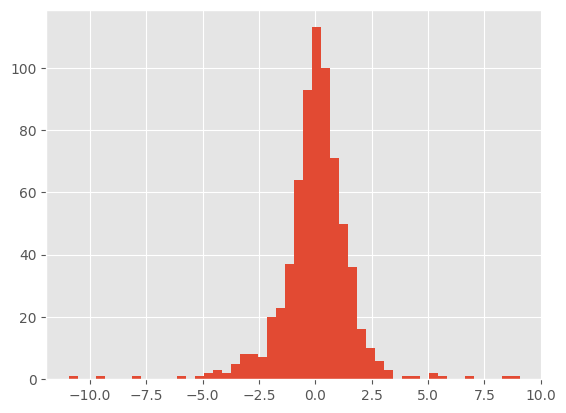

In [78]:
plt.hist(spy_daily_pc, bins = 50)
plt.show()

**Linea 1**

La frecuencia se expresa dividiendo la variación porcentual diaria de la cotización en 50 tramos.

####  <FONT COLOR="blue">**Paso 7**</FONT>

Creemos un nuevo marco de datos que calcule las variaciones diarias del precio de las acciones para todos los teletipos, calculemos los rendimientos acumulados diarios y analicemos la correlación.


In [79]:
stock_daily_pc = (stock-stock.shift(1))/stock.shift(1)*100

In [80]:
stock_daily_pc.head()

Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Date,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.757223,-0.998229,-0.904532,-1.151518,1.540034,0.841354,1.368931
2020-01-06,0.381505,0.616889,0.370054,0.245254,-0.567850,0.119181,1.012827
2020-01-07,-0.281178,0.038053,-0.307239,0.244642,-0.491584,-0.178564,0.401072
2020-01-08,0.532954,0.997507,0.406798,-0.488102,-0.661089,-1.371494,-0.732361


La fórmula de la rentabilidad acumulada diaria simple también es sencilla.

Se puede obtener acumulando y multiplicando la tasa de variación diaria del precio de las acciones obtenida anteriormente. Podemos utilizar el método .compsum().


In [81]:
stock_d_cr = stock_daily_pc.cumsum()

In [82]:
stock_d_cr

Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Date,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.757223,-0.998229,-0.904532,-1.151518,1.540034,0.841354,1.368931
2020-01-06,-0.375718,-0.381340,-0.534478,-0.906264,0.972184,0.960535,2.381757
2020-01-07,-0.656896,-0.343287,-0.841717,-0.661622,0.480600,0.781971,2.782830
2020-01-08,-0.123942,0.654220,-0.434919,-1.149724,-0.180489,-0.589523,2.050469
...,...,...,...,...,...,...,...
2022-09-22,22.763365,40.799309,9.160753,25.600944,-21.693536,13.058748,61.459882
2022-09-23,21.087883,39.465805,6.875937,23.664838,-21.285062,9.663861,59.726509
2022-09-26,20.098614,38.507931,5.675886,22.036013,-23.196128,7.382733,58.571920


<AxesSubplot: xlabel='Date'>

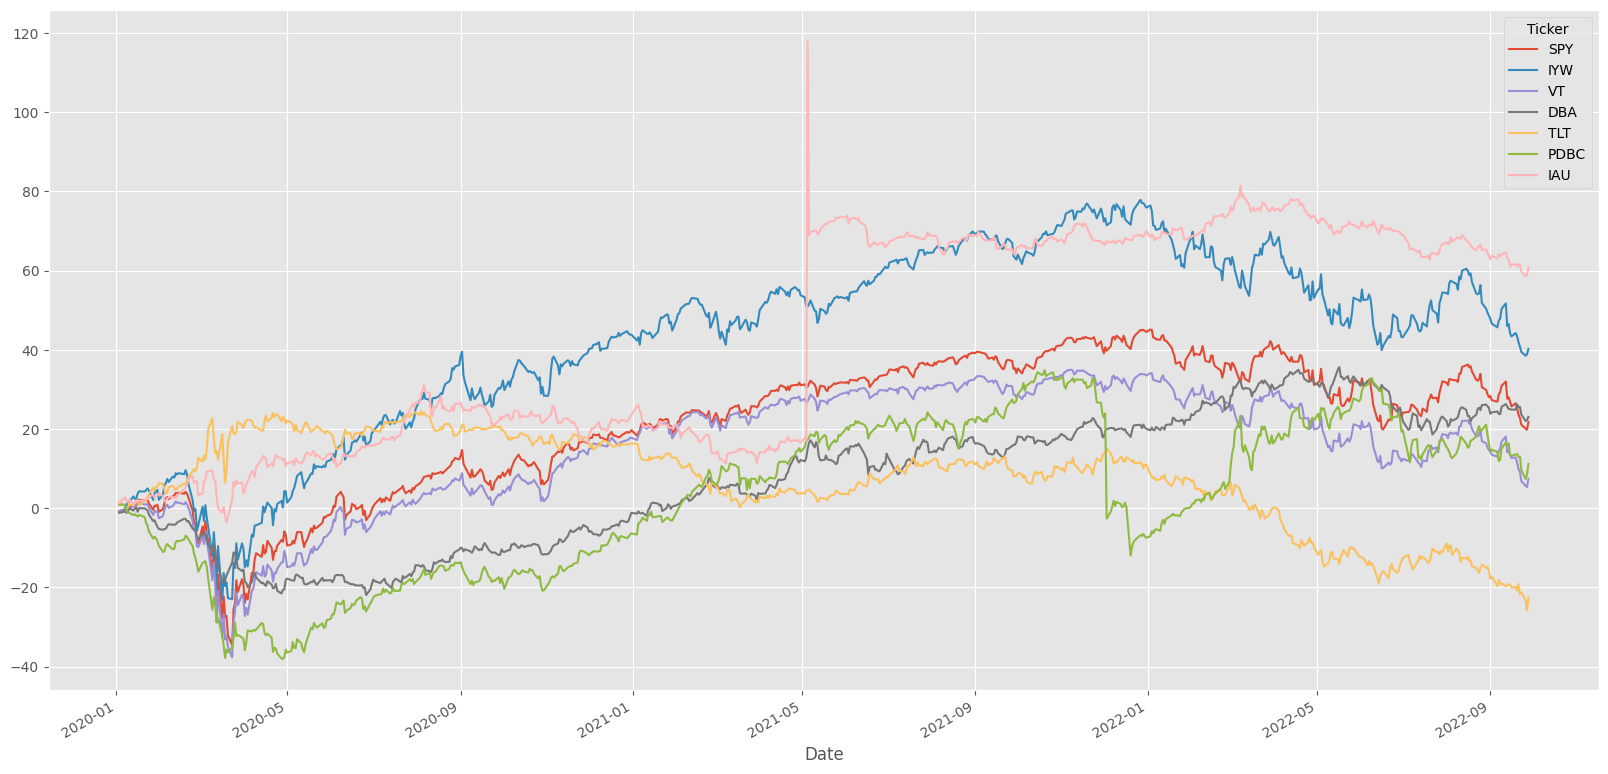

In [83]:
stock_d_cr.plot(figsize = (20,10))

####  <FONT COLOR="blue">**Paso 8**</FONT>

El coeficiente de correlación se refiere a la medición de la fuerza de la asociación entre los datos, como hemos aprendido antes. Cuanto más cerca de 1,0, más fuerte es la relación, y cuanto más cerca de 0, menos relación. Vamos a analizarlo utilizando la función aprendida .corr().


In [84]:
df_corr = stock_daily_pc.corr()

In [85]:
df_corr

Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Ticker,,,,,,,
SPY,1.000000,0.923008,0.978224,0.259712,-0.288456,0.290457,0.022268
IYW,0.923008,1.000000,0.894900,0.211246,-0.195669,0.224835,0.022668
VT,0.978224,0.894900,1.000000,0.286419,-0.284423,0.316557,0.040084
DBA,0.259712,0.211246,0.286419,1.000000,-0.184604,0.464451,0.104330
TLT,-0.288456,-0.195669,-0.284423,-0.184604,1.000000,-0.171764,0.057764
PDBC,0.290457,0.224835,0.316557,0.464451,-0.171764,1.000000,0.049203
IAU,0.022268,0.022668,0.040084,0.104330,0.057764,0.049203,1.000000


Visualicémoslo como un mapa de calor.

Cuanto más oscuro sea el color, menor será la correlación y cuanto más brillante sea el color, mayor será la correlación. Comprobemos cómo se correlaciona cada factor económico en la economía real.


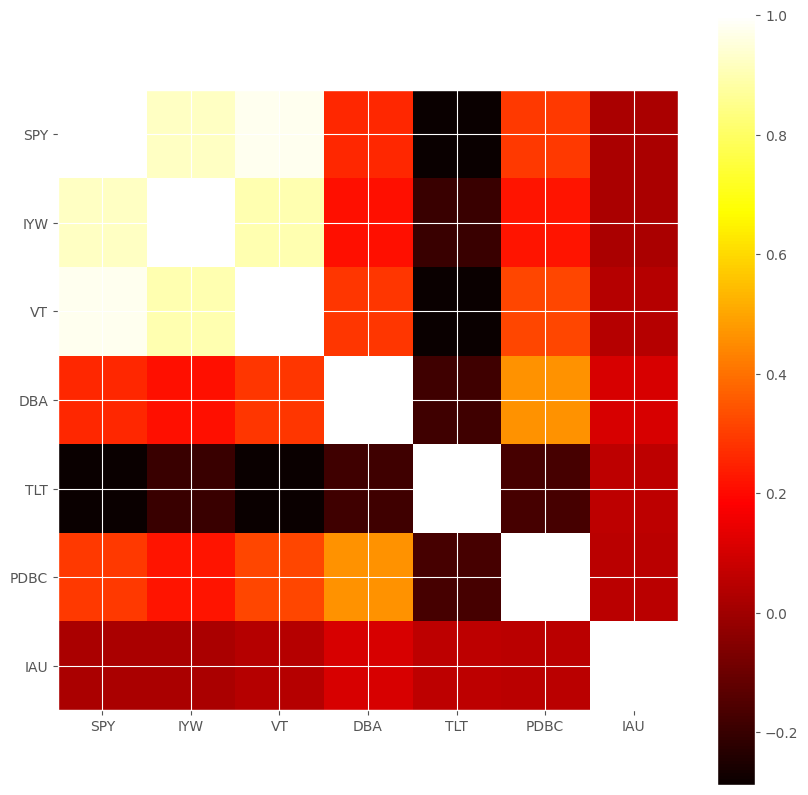

In [86]:
plt.imshow(df_corr, cmap = 'hot', interpolation = 'none')
plt.colorbar()
plt.xticks(range(len(df_corr)),df_corr.columns)
plt.yticks(range(len(df_corr)),df_corr.columns)

plt.gcf().set_size_inches(10,10)

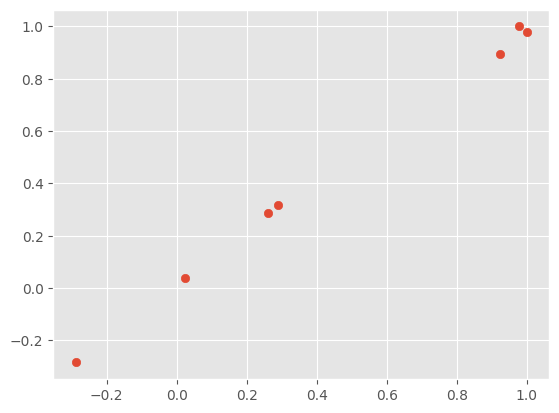

In [87]:
plt.scatter(df_corr.SPY,df_corr.VT)
plt.show()

🔵  Se puede ver que los bonos estadounidenses y las acciones en general están completamente descorrelacionados por las condiciones económicas.

- Cuando la economía es buena, los resultados de la empresa mejoran y el precio de las acciones sube. A la inversa, cuando la economía va mal, el valor de los bonos sube. Ahora es posible comprobarlo mediante el análisis de datos reales, en lugar de la teoría.

Si se piensa una vez más aplicando el coeficiente de correlación en la práctica, hay un efecto complementario para cada activo. Puedes crear una estrategia para mitigar el riesgo.

Un coeficiente de correlación cercano a 1 significa que el valor sube cuando sube y baja cuando baja. Significa que no hay un efecto de mitigación del riesgo entre ellos. Si el coeficiente de correlación es cercano a 0, significa que no hay relación entre las subidas y las bajadas del valor y, por el contrario, el efecto de mitigación del riesgo es grande.

Por ejemplo, puede utilizarse para elaborar un plan de marketing en el mundo real. Como herramienta de toma de decisiones basada en datos, puede utilizarse para analizar la correlación entre el momento de las ventas y las ventas por producto, para establecer el momento de lanzamiento de un producto y para construir carteras de empresas.


####  <FONT COLOR="blue">**Paso 9**</FONT>

Hagamos un seguimiento de la variación del precio de las acciones durante un periodo de tiempo determinado. Esta técnica suele utilizarse para determinar el índice de riesgo de la acción comparando la volatilidad de todo el índice del mercado como dato de referencia.

El propósito es medir la cantidad de cambio en un período específico y compararlo con datos de referencia estables para utilizarlo para determinar el riesgo de los datos evaluados actualmente.

En primer lugar, la volatilidad del precio de las acciones puede obtenerse calculando la desviación estándar de la volatilidad del precio de las acciones a través de la media móvil. Lo que más influye en estos datos es el periodo de tiempo que se va a seguir. Es decir, el tamaño de la ventana tiene un gran efecto.
Si la ventana es amplia, la representatividad será borrosa, y si es demasiado estrecha, se acercará a la desviación estándar. Es muy difícil e importante fijar el tamaño de la ventana a medir.

No todo puede concluirse mediante cálculos informáticos. Hay muchos momentos en los que hay que tomar una decisión basándose en la comprensión del contexto y del resultado a conseguir.

Es muy importante entender que los resultados de los datos pueden ser diferentes dependiendo del juicio del alumno, y la toma de decisiones en el mundo real puede cambiarse en consecuencia, en lugar de limitarse a aprender las habilidades como una tarea práctica utilizando pandas.


In [89]:
periods = 75

vol = stock_daily_pc.rolling(window = periods).std()

vol

Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Date,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-09-22,1.497875,2.086870,1.368349,1.103695,1.262322,1.676520,0.846181
2022-09-23,1.503195,2.084886,1.386101,1.124074,1.256228,1.712220,0.861154
2022-09-26,1.502413,2.085089,1.387966,1.136470,1.270326,1.721312,0.868645


<AxesSubplot: xlabel='Date'>

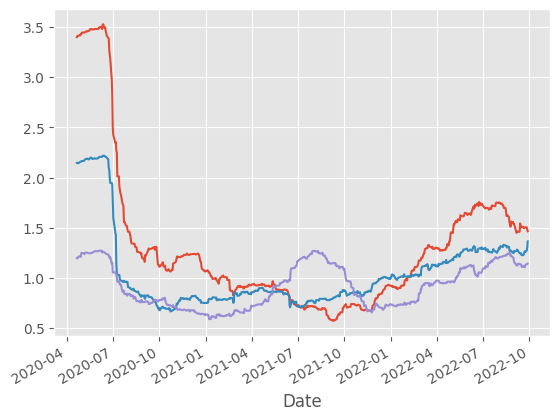

In [91]:
vol["SPY"].plot()
vol["TLT"].plot()
vol["DBA"].plot()